In [1]:
import numpy as np
import pandas as pd

import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt

# Custom functions
from utils.constants import METRICS

/home/astroutb/Documentos/juand/NMDB/.venv/lib/python3.12/site-packages/nolds/datasets.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
metrics_columns = list(METRICS.keys())
metrics_columns

['entropy',
 'sampen',
 'permutation_entropy',
 'shannon_entropy',
 'spectral_entropy',
 'app_entropy',
 'hurst',
 'dfa',
 'mfhurst_b',
 'higuchi_fd',
 'katz_fd',
 'petrosian_fd',
 'lepel_ziv',
 'corr_dim']

In [3]:
# LaTeX is being installed
plt.style.use(["science", "nature"])
plt.rcParams.update(
    {
        "font.size": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "axes.labelsize": 12,
        "legend.fontsize": 12,
    }
)

## Testing EWM

In [4]:
# Read a random metric file to see how to plot what I want (you'll see)
df = pd.read_csv("data/ForbushDecrease/2024-03-24/invk_metrics-windowsize_130.csv", index_col=0)
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2520 entries, 2024-03-23 00:00:00 to 2024-03-26 11:58:00
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   value                2520 non-null   float64
 1   window_shape         2520 non-null   int64  
 2   entropy              2520 non-null   float64
 3   sampen               2520 non-null   float64
 4   permutation_entropy  2520 non-null   float64
 5   shannon_entropy      2520 non-null   float64
 6   spectral_entropy     2520 non-null   float64
 7   app_entropy          2520 non-null   float64
 8   hurst                2520 non-null   float64
 9   dfa                  2520 non-null   float64
 10  mfhurst_b            2520 non-null   float64
 11  higuchi_fd           2520 non-null   float64
 12  katz_fd              2520 non-null   float64
 13  petrosian_fd         2520 non-null   float64
 14  lepel_ziv            2520 non-null   int64  
 15  co

In [5]:
ewm_columns = metrics_columns + ["value"]
new_df = df.copy()
new_df[ewm_columns] = df[ewm_columns].ewm(alpha=0.15).mean()

In [6]:
metrics_columns

['entropy',
 'sampen',
 'permutation_entropy',
 'shannon_entropy',
 'spectral_entropy',
 'app_entropy',
 'hurst',
 'dfa',
 'mfhurst_b',
 'higuchi_fd',
 'katz_fd',
 'petrosian_fd',
 'lepel_ziv',
 'corr_dim']

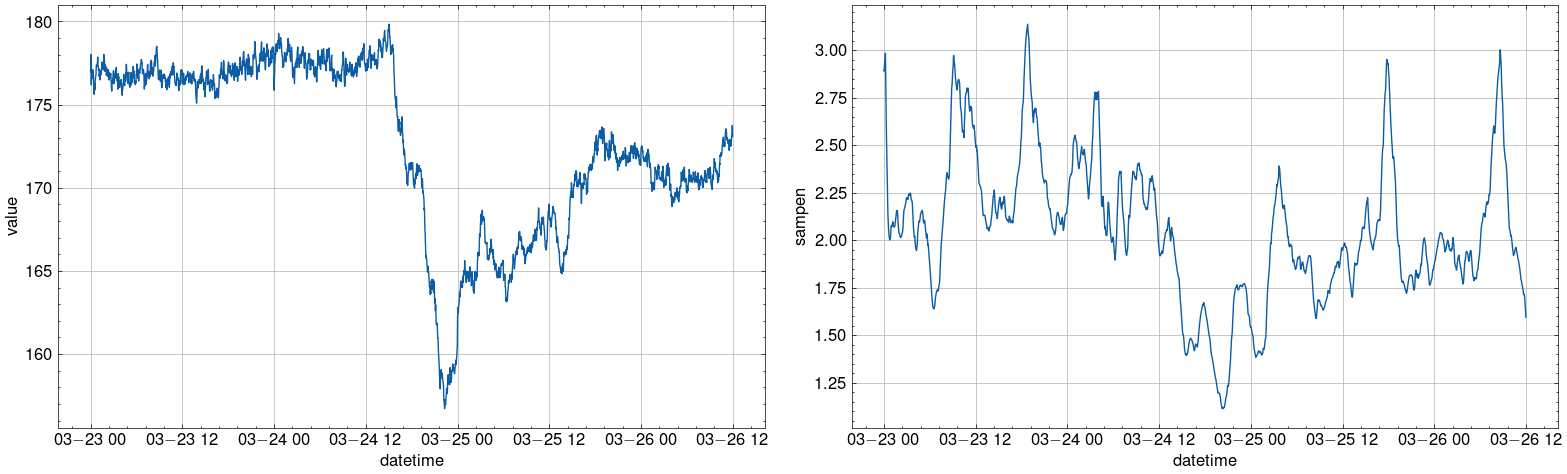

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.lineplot(new_df, x="datetime", y="value", ax=axes[0])
sns.lineplot(new_df, x="datetime", y="sampen", ax=axes[1])

for ax in axes.flatten():
    ax.grid()

fig.tight_layout()
plt.show()

## Testing new plots

Normalization. And an offset of 10 it's appropiate

In [8]:
new_df = df.copy()
 
for metric in ewm_columns:   
    new_df[metric] = (new_df[metric] - new_df[metric].mean()) / new_df[metric].std()

In [9]:
describe = new_df.describe()
for col in describe.columns:
    min_value = np.abs(describe[col]["min"])
    max_value = np.abs(describe[col]["max"])
    print(f"col: {col} --- Offset: {max_value + min_value}")

display(describe)

col: value --- Offset: 5.48757262751652
col: window_shape --- Offset: 195.0
col: entropy --- Offset: 8.515131344023676
col: sampen --- Offset: 5.528814980619043
col: permutation_entropy --- Offset: 6.196754900019375
col: shannon_entropy --- Offset: 6.19364803081748
col: spectral_entropy --- Offset: 4.411392221680092
col: app_entropy --- Offset: 7.66409888246819
col: hurst --- Offset: 7.195117731709187
col: dfa --- Offset: 7.606751605106197
col: mfhurst_b --- Offset: 5.5488907840572175
col: higuchi_fd --- Offset: 5.6202910347544695
col: katz_fd --- Offset: 5.628537803131111
col: petrosian_fd --- Offset: 7.332217371525321
col: lepel_ziv --- Offset: 7.610736105550719
col: corr_dim --- Offset: 6.6021291003276055


,value,window_shape,entropy,sampen,permutation_entropy,shannon_entropy,spectral_entropy,app_entropy,hurst,dfa,mfhurst_b,higuchi_fd,katz_fd,petrosian_fd,lepel_ziv,corr_dim
count,2.520000e+03,2520.000000,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03,2.520000e+03
mean,-5.413659e-16,128.323413,-8.126128e-15,-5.639228e-16,3.360980e-14,-2.368476e-15,-4.736952e-16,-9.248334e-16,4.285813e-16,3.157968e-16,-1.127846e-16,3.552714e-15,4.511382e-17,7.633259e-14,-3.721891e-16,1.533870e-15
std,1.000000e+00,8.359276,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.600381e+00,65.000000,-8.320009e+00,-2.546567e+00,-5.063842e+00,-3.358489e+00,-3.565266e+00,-5.104521e+00,-3.427102e+00,-4.674404e+00,-2.051226e+00,-3.528016e+00,-2.000458e+00,-3.598608e+00,-5.092417e+00,-3.432278e+00
25%,-6.589063e-01,130.000000,1.944519e-01,-6.125959e-01,-2.437610e-01,-5.584374e-01,-7.052950e-03,-5.540464e-01,-6.722896e-01,-5.988257e-01,-6.734186e-01,-3.836863e-01,-7.664438e-01,-5.611757e-01,-5.735422e-01,-6.328481e-01
50%,1.740452e-01,130.000000,1.947746e-01,-7.210873e-02,2.524319e-01,1.094392e-02,3.914123e-01,-1.263416e-02,-2.085334e-03,4.540130e-03,-2.767046e-01,1.910393e-01,-1.843777e-02,-3.269434e-02,1.399643e-01,-1.850859e-01
75%,8.083910e-01,130.000000,1.949038e-01,5.691597e-01,6.115914e-01,6.480836e-01,5.805758e-01,6.356954e-01,5.600541e-01,6.342150e-01,4.395452e-01,6.852620e-01,6.898327e-01,6.685491e-01,6.156353e-01,4.973288e-01
max,1.887192e+00,130.000000,1.951222e-01,2.982248e+00,1.132912e+00,2.835159e+00,8.461263e-01,2.559578e+00,3.768016e+00,2.932348e+00,3.497665e+00,2.092275e+00,3.628080e+00,3.733610e+00,2.518319e+00,3.169851e+00


In [10]:
OFFSET = 10
plot_df = new_df.copy()

for i, col in enumerate(ewm_columns, start=1):
    print(f"Metric: {col} -- Offset: {OFFSET * i}")
    plot_df[col] = plot_df[col] + OFFSET * i

Metric: entropy -- Offset: 10
Metric: sampen -- Offset: 20
Metric: permutation_entropy -- Offset: 30
Metric: shannon_entropy -- Offset: 40
Metric: spectral_entropy -- Offset: 50
Metric: app_entropy -- Offset: 60
Metric: hurst -- Offset: 70
Metric: dfa -- Offset: 80
Metric: mfhurst_b -- Offset: 90
Metric: higuchi_fd -- Offset: 100
Metric: katz_fd -- Offset: 110
Metric: petrosian_fd -- Offset: 120
Metric: lepel_ziv -- Offset: 130
Metric: corr_dim -- Offset: 140
Metric: value -- Offset: 150


In [11]:
plot_df.describe()

,value,window_shape,entropy,sampen,permutation_entropy,shannon_entropy,spectral_entropy,app_entropy,hurst,dfa,mfhurst_b,higuchi_fd,katz_fd,petrosian_fd,lepel_ziv,corr_dim
count,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,150.000000,128.323413,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000,100.000000,110.000000,120.000000,130.000000,140.000000
std,1.000000,8.359276,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,146.399619,65.000000,1.679991,17.453433,24.936158,36.641511,46.434734,54.895479,66.572898,75.325596,87.948774,96.471984,107.999542,116.401392,124.907583,136.567722
25%,149.341094,130.000000,10.194452,19.387404,29.756239,39.441563,49.992947,59.445954,69.327710,79.401174,89.326581,99.616314,109.233556,119.438824,129.426458,139.367152
50%,150.174045,130.000000,10.194775,19.927891,30.252432,40.010944,50.391412,59.987366,69.997915,80.004540,89.723295,100.191039,109.981562,119.967306,130.139964,139.814914
75%,150.808391,130.000000,10.194904,20.569160,30.611591,40.648084,50.580576,60.635695,70.560054,80.634215,90.439545,100.685262,110.689833,120.668549,130.615635,140.497329
max,151.887192,130.000000,10.195122,22.982248,31.132912,42.835159,50.846126,62.559578,73.768016,82.932348,93.497665,102.092275,113.628080,123.733610,132.518319,143.169851


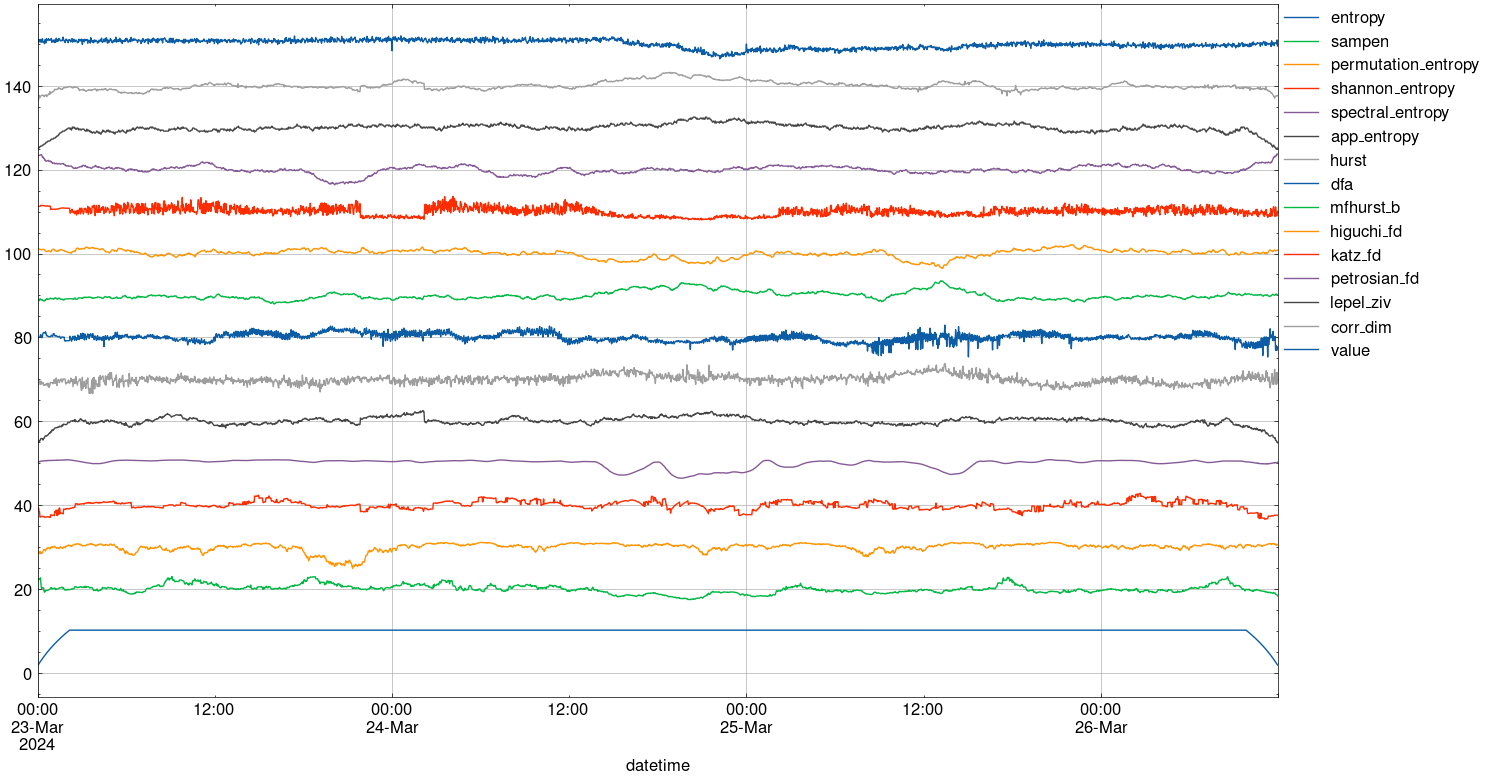

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))
plot_df[ewm_columns].plot(ax=ax)
 
ax.grid()
ax.legend(bbox_to_anchor=(1.0, 1), loc="upper left", borderaxespad=0.0)

plt.show()